In [148]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
plt.style.use('ggplot')



# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

# 1. Import and Reading Data

In [149]:
# Read the CSV file
df = pd.read_csv( "DM2425_ABCDEats_DATASET.csv")

In [150]:
df_backup=df

In [151]:
df.shape

(31888, 56)

In [152]:
# Display the first few rows of the dataframe
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#Check columns
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [154]:
df= df.rename(columns={'DOW_0':'Monday', 'DOW_1':'Tuesday', 'DOW_2':'Wednesday', 'DOW_3':'Thursday', 'DOW_4':'Friday', 'DOW_5':'Saturday',
       'DOW_6':'Sunday'})

In [155]:
# Check data types
df.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
Monday                        int64
Tuesday                       int64
Wednesday                   

In [179]:
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

# 2. Data Preparation

In [157]:
df_without_id = df.drop(['customer_id'], axis=1) 
   

In [158]:
df_without_id.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
1,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
2,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0
3,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
4,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,0,0,0,0,0


In [159]:
df.isnull().any()

customer_id                 False
customer_region             False
customer_age                 True
vendor_count                False
product_count               False
is_chain                    False
first_order                  True
last_order                  False
last_promo                  False
payment_method              False
CUI_American                False
CUI_Asian                   False
CUI_Beverages               False
CUI_Cafe                    False
CUI_Chicken Dishes          False
CUI_Chinese                 False
CUI_Desserts                False
CUI_Healthy                 False
CUI_Indian                  False
CUI_Italian                 False
CUI_Japanese                False
CUI_Noodle Dishes           False
CUI_OTHER                   False
CUI_Street Food / Snacks    False
CUI_Thai                    False
Monday                      False
Tuesday                     False
Wednesday                   False
Thursday                    False
Friday        

In [160]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
Monday                         0
Tuesday                        0
Wednesday                      0
Thursday                       0
Friday                         0
Saturday  

In [161]:
missing_percentage = df.isnull().mean() * 100

print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
customer_id                 0.000000
customer_region             0.000000
customer_age                2.279854
vendor_count                0.000000
product_count               0.000000
is_chain                    0.000000
first_order                 0.332413
last_order                  0.000000
last_promo                  0.000000
payment_method              0.000000
CUI_American                0.000000
CUI_Asian                   0.000000
CUI_Beverages               0.000000
CUI_Cafe                    0.000000
CUI_Chicken Dishes          0.000000
CUI_Chinese                 0.000000
CUI_Desserts                0.000000
CUI_Healthy                 0.000000
CUI_Indian                  0.000000
CUI_Italian                 0.000000
CUI_Japanese                0.000000
CUI_Noodle Dishes           0.000000
CUI_OTHER                   0.000000
CUI_Street Food / Snacks    0.000000
CUI_Thai                    0.000000
Monday                      0.000000
Tuesday 

In [162]:
df.duplicated().sum()

13

In [163]:
df.loc[df.duplicated(keep=False)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0


In [164]:
df_without_duplicates=df.drop_duplicates()

In [165]:
df_without_duplicates.duplicated().sum()

0

# 3. Feature Understanding

In [166]:
df['customer_age'].value_counts()

customer_age
23.0    2361
22.0    2318
24.0    2304
25.0    2262
26.0    2059
        ... 
79.0       2
75.0       2
78.0       1
71.0       1
73.0       1
Name: count, Length: 66, dtype: int64

In [167]:
result = df[df['last_order'] < df['first_order']]
print(result)


Empty DataFrame
Columns: [customer_id, customer_region, customer_age, vendor_count, product_count, is_chain, first_order, last_order, last_promo, payment_method, CUI_American, CUI_Asian, CUI_Beverages, CUI_Cafe, CUI_Chicken Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle Dishes, CUI_OTHER, CUI_Street Food / Snacks, CUI_Thai, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday, HR_0, HR_1, HR_2, HR_3, HR_4, HR_5, HR_6, HR_7, HR_8, HR_9, HR_10, HR_11, HR_12, HR_13, HR_14, HR_15, HR_16, HR_17, HR_18, HR_19, HR_20, HR_21, HR_22, HR_23]
Index: []

[0 rows x 56 columns]


In [168]:
df['customer_age'].unique()

array([18., 17., 38., nan, 20., 40., 24., 27., 33., 26., 21., 51., 35.,
       22., 31., 15., 47., 19., 28., 32., 25., 37., 42., 48., 16., 34.,
       29., 23., 30., 39., 46., 41., 49., 53., 36., 43., 44., 45., 57.,
       58., 68., 56., 61., 60., 54., 59., 50., 55., 52., 65., 75., 66.,
       79., 80., 63., 77., 62., 69., 72., 64., 76., 74., 67., 70., 78.,
       71., 73.])

In [169]:
df['payment_method'].value_counts()

payment_method
CARD    20161
DIGI     6101
CASH     5626
Name: count, dtype: int64

In [170]:
df['last_promo'].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

In [171]:
df['last_promo'] = df['last_promo'].replace('-', 'N0 PROMO')

In [172]:
df['last_promo'].value_counts()

last_promo
N0 PROMO    16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

In [173]:
df['customer_region'].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [174]:
df['vendor_count'].unique()

array([ 2,  1,  3,  4,  5,  7,  6, 11,  9,  8, 12, 14, 20, 13, 10, 16, 24,
       18, 17, 15, 25, 30, 19, 21, 23, 22, 28, 32, 41, 40, 26,  0, 27, 34,
       31, 35, 29], dtype=int64)

In [175]:
df['HR_17'].value_counts()

HR_17
0     24272
1      5034
2      1511
3       553
4       274
5       100
6        54
7        31
8        17
9        12
10       10
11        5
12        4
13        4
14        2
18        2
17        1
20        1
15        1
Name: count, dtype: int64

In [178]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [188]:
df['HR_0'] = df['HR_0'].fillna(0).astype(int)
df['morning'] = df['HR_3']+df['HR_4']+df['HR_5']+df['HR_6']+df['HR_7']+df['HR_8']+df['HR_9']+df['HR_10']+df['HR_11']


df['lunch_time'] = df['HR_12']+ df['HR_13']+ df['HR_14']+ df['HR_15']

df['afternoon'] =df[ 'HR_16']+df[ 'HR_17']+df['HR_18']+df['HR_19']

df['evening'] = df['HR_20'] + df['HR_21'] + df['HR_22'] + df['HR_23'] + df['HR_0'] + df['HR_1'] + df['HR_2']



print(df['morning'].sum())
print(df['lunch_time'].sum())
print(df['afternoon'].sum())
print(df['evening'].sum())




48547
33268
42410
13535


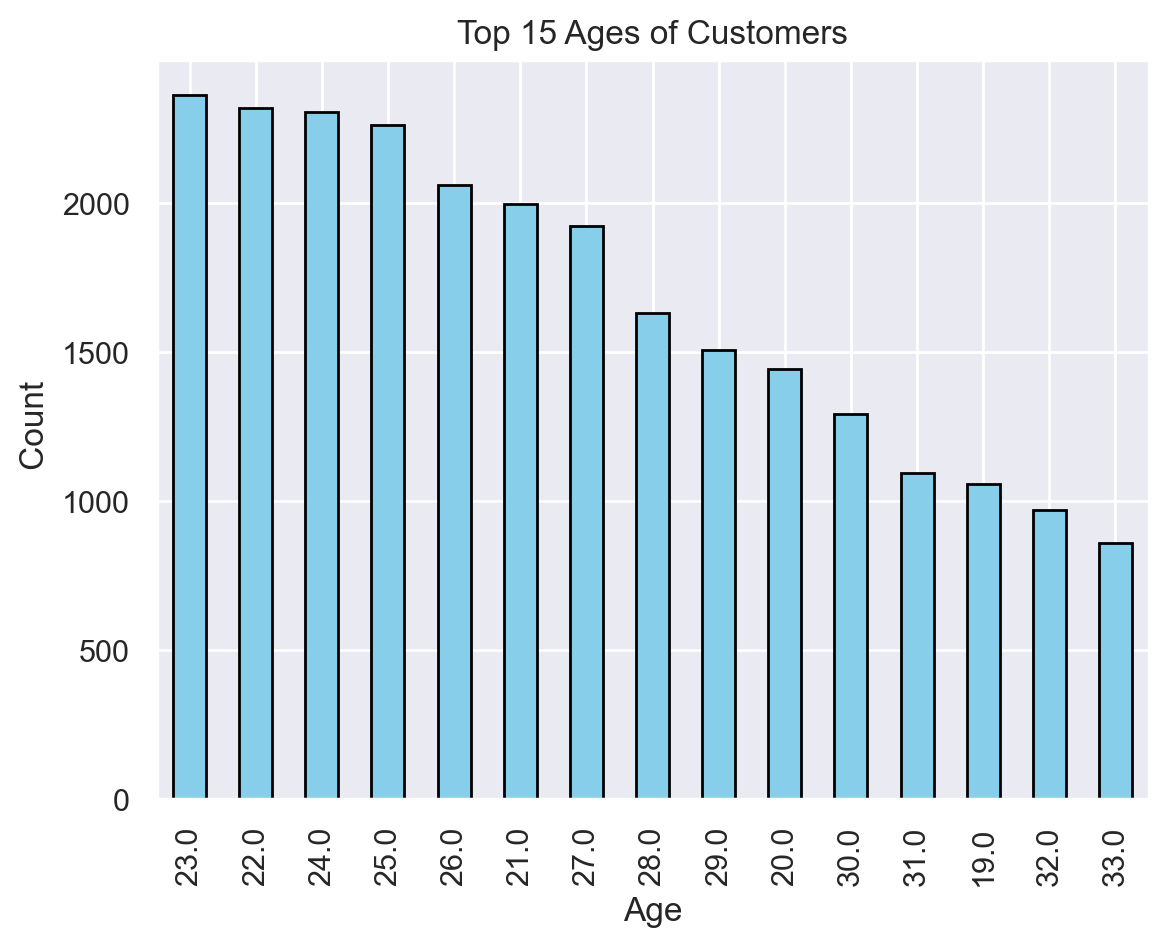

In [31]:
age_bar_graph = df['customer_age'].value_counts() \
    .head(15) \
    .plot (kind='bar',
           color='skyblue', 
           edgecolor='black',
           title = 'Top 15 Ages of Customers', 
           xlabel='Age', 
           ylabel= ' Count')


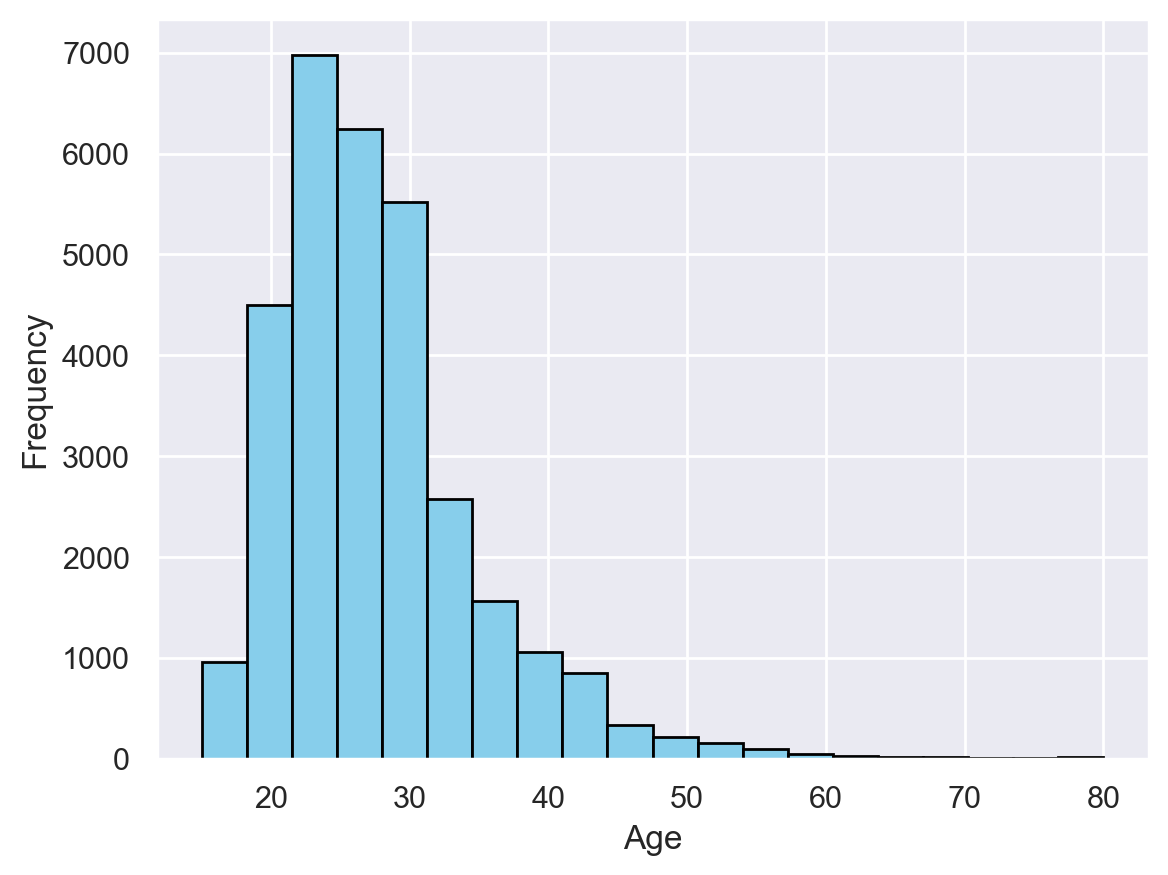

In [32]:
hist_age = df['customer_age'].plot(kind='hist',
                                   color='skyblue', 
                                   edgecolor='black',
                                   bins=20, 
                                   xlabel='Age')

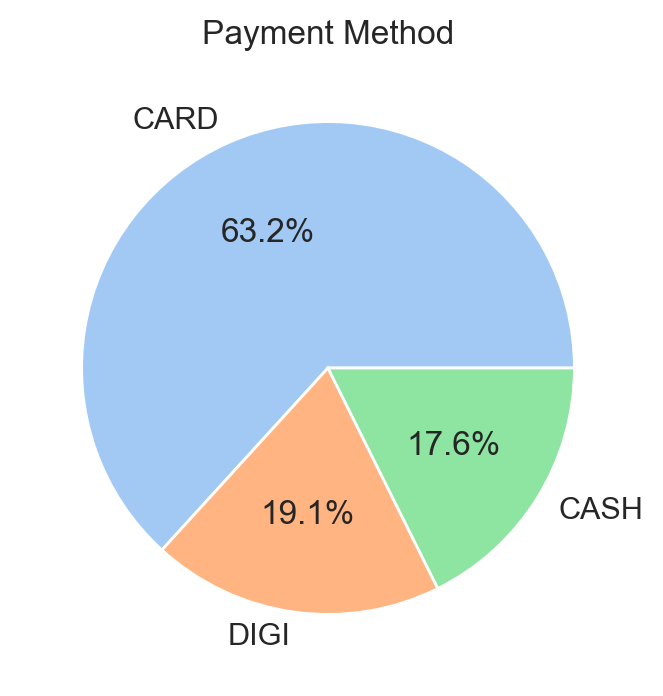

In [33]:
plt.figure(figsize=(8, 6))
payment_method_pie = df['payment_method'].value_counts() \
    .plot (kind='pie', 
           title='Payment Method', 
           autopct='%1.1f%%',
           colors=sns.color_palette("pastel"),
           figsize=(5, 4), 
           ylabel="")

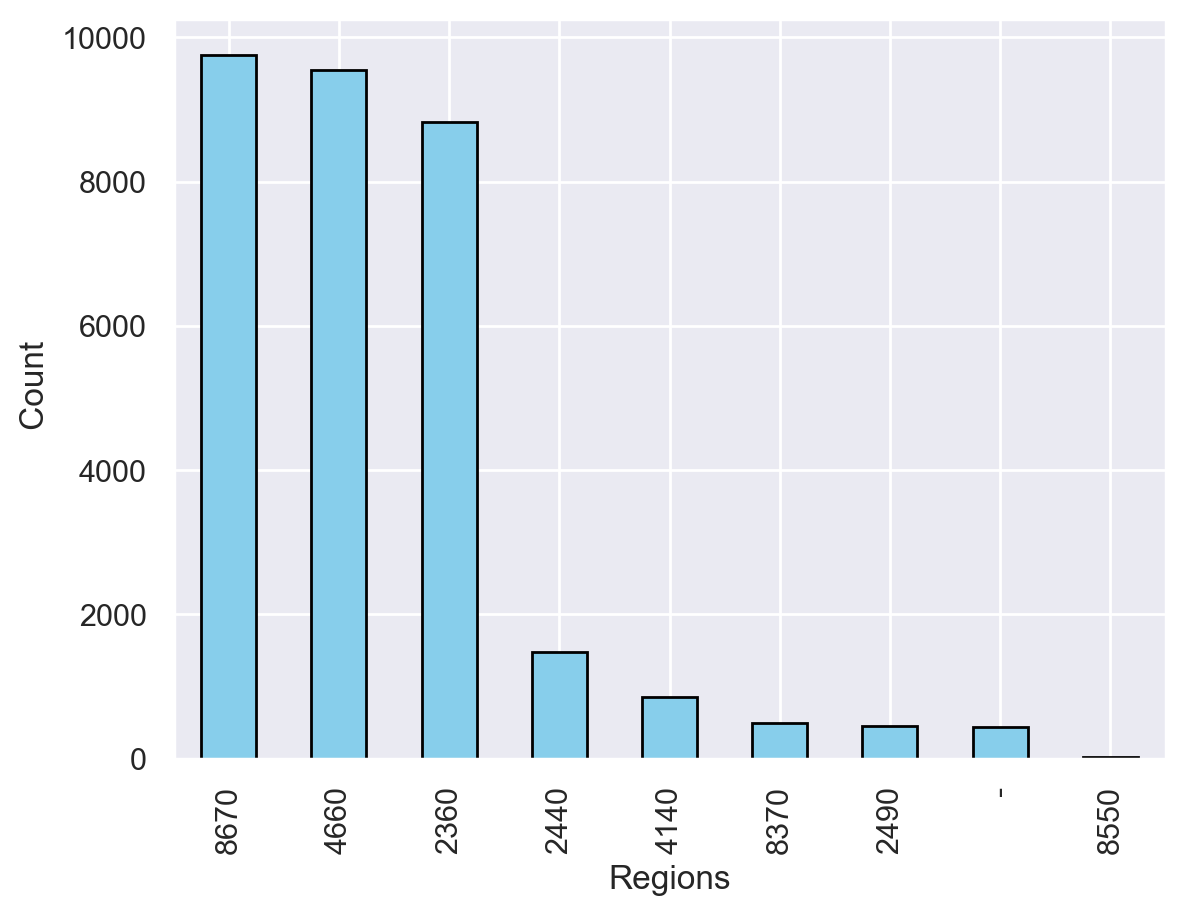

In [34]:
Region_bar_graph = df['customer_region'].value_counts().plot (kind='bar',
           color='skyblue', 
           edgecolor='black',
           xlabel='Regions', 
           ylabel= ' Count')
                                                              
           

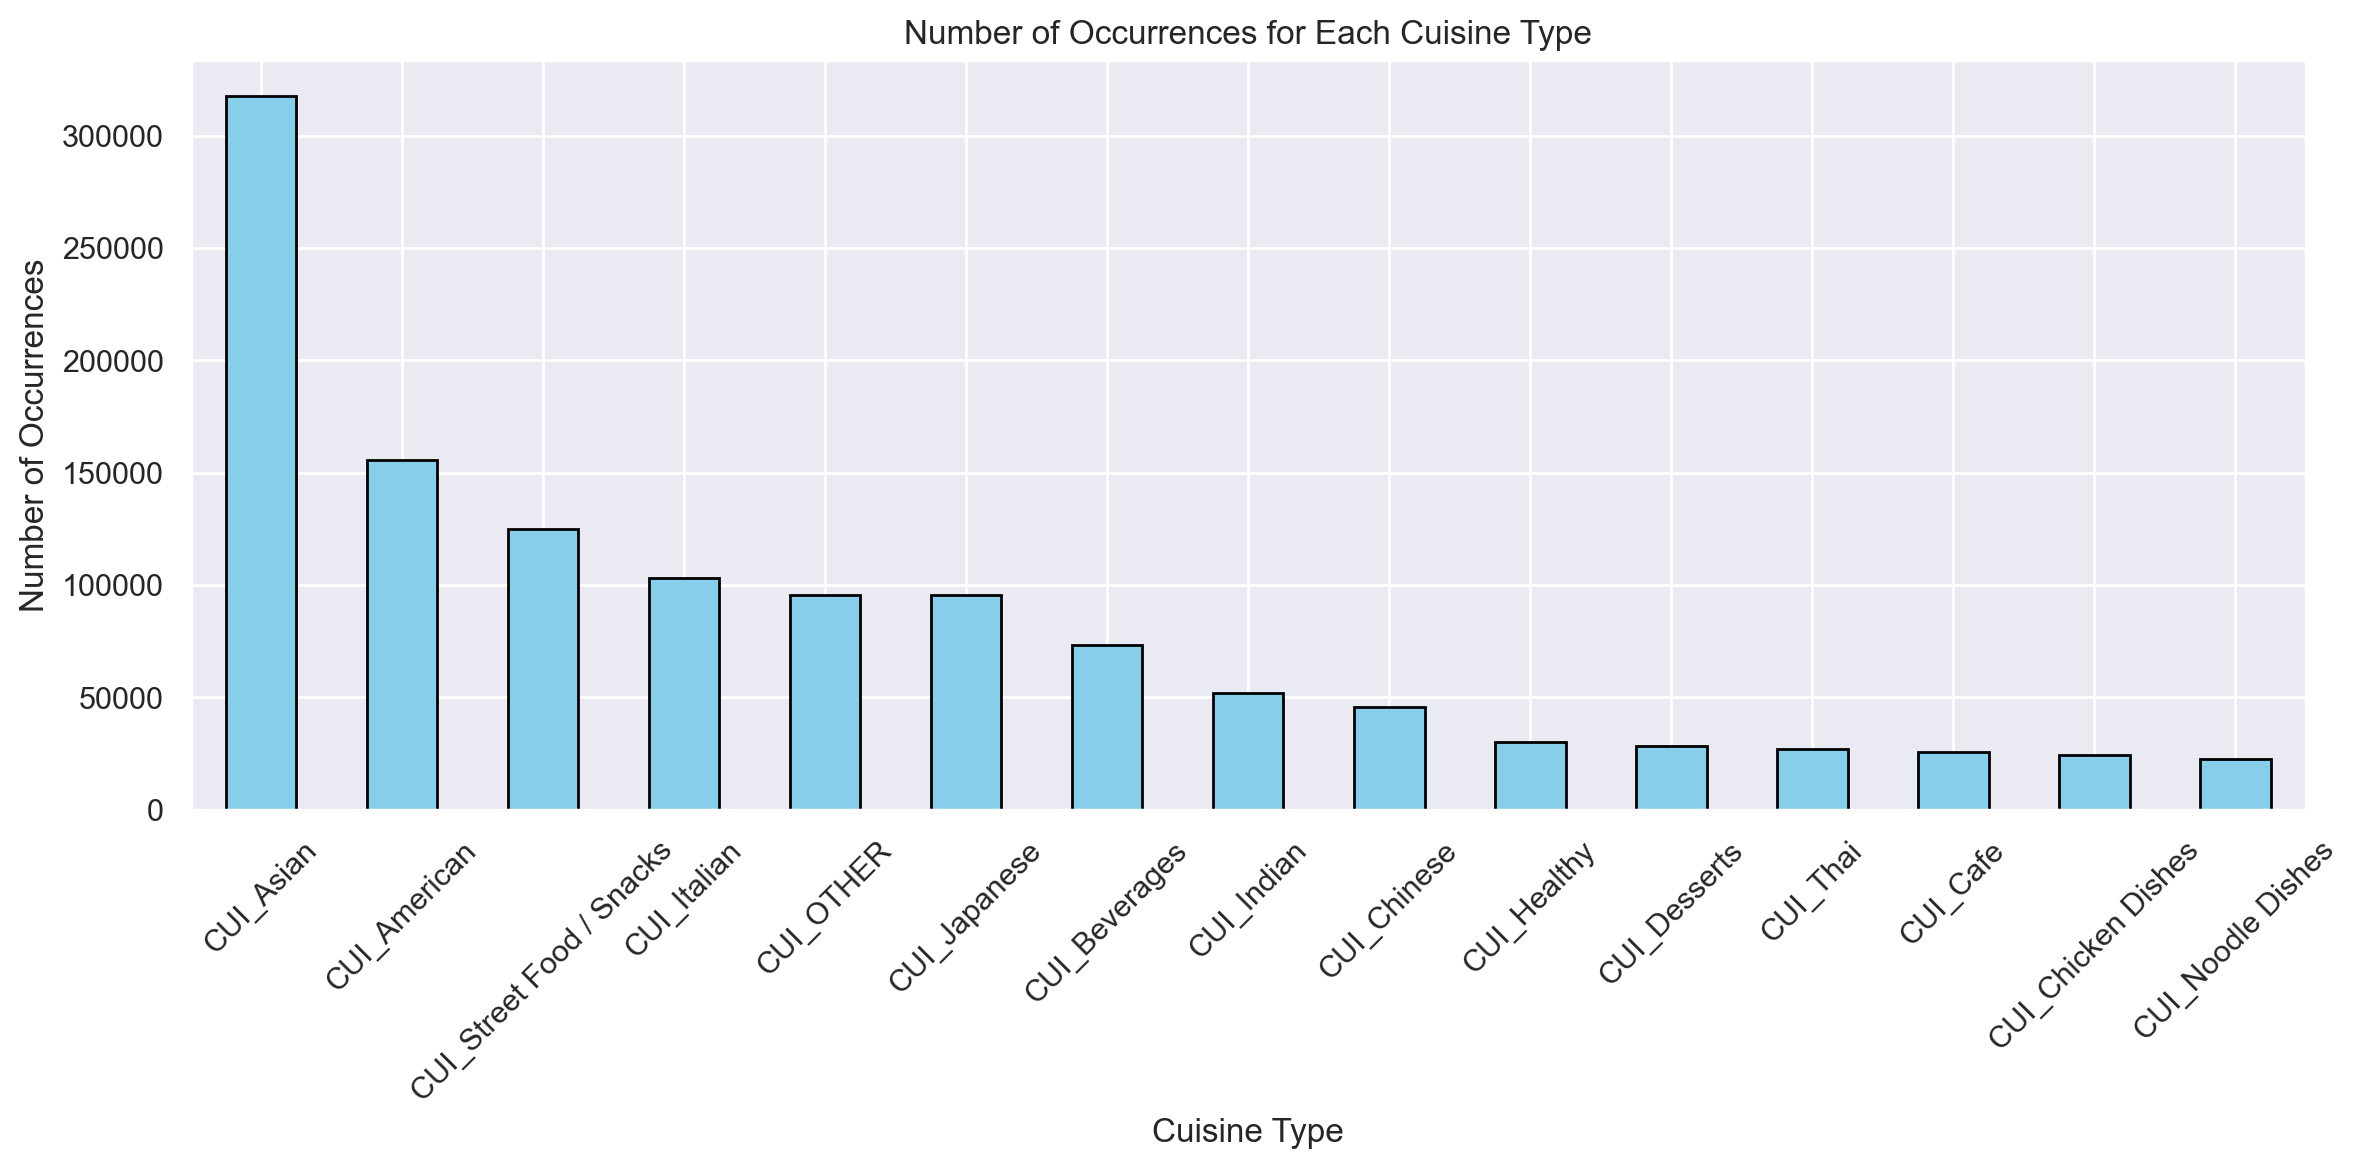

In [35]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
cuisine_counts = df[cuisine_columns].sum()
cuisine_counts_sorted = cuisine_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
cuisine_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Occurrences for Each Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

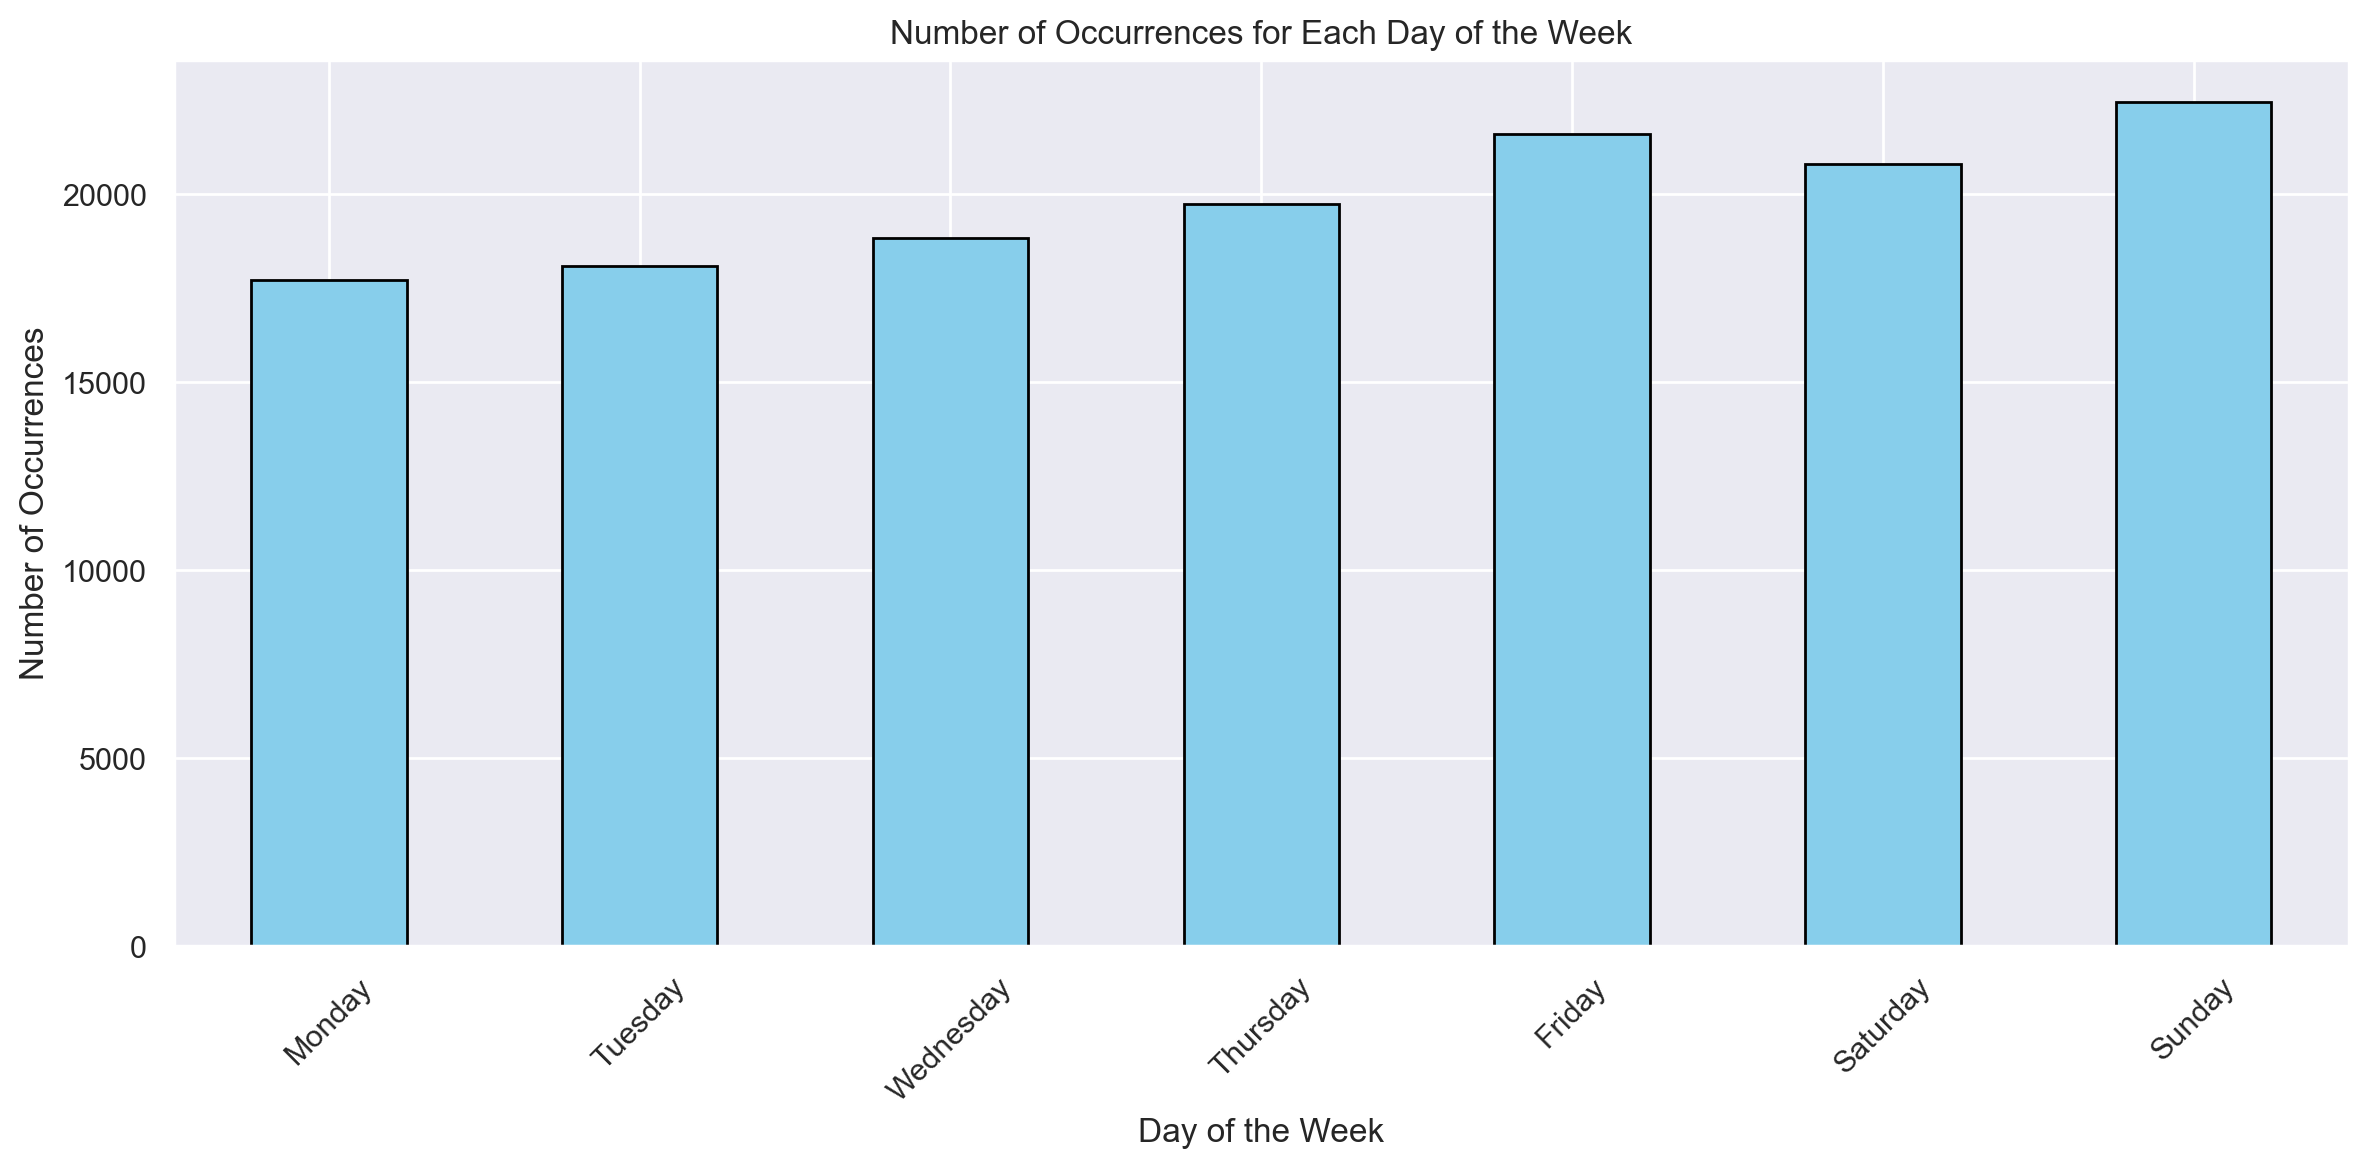

In [36]:
days_of_the_week = df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
DOW_counts = days_of_the_week.sum()
#DOW_counts_sorted = DOW_counts.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
DOW_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Occurrences for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

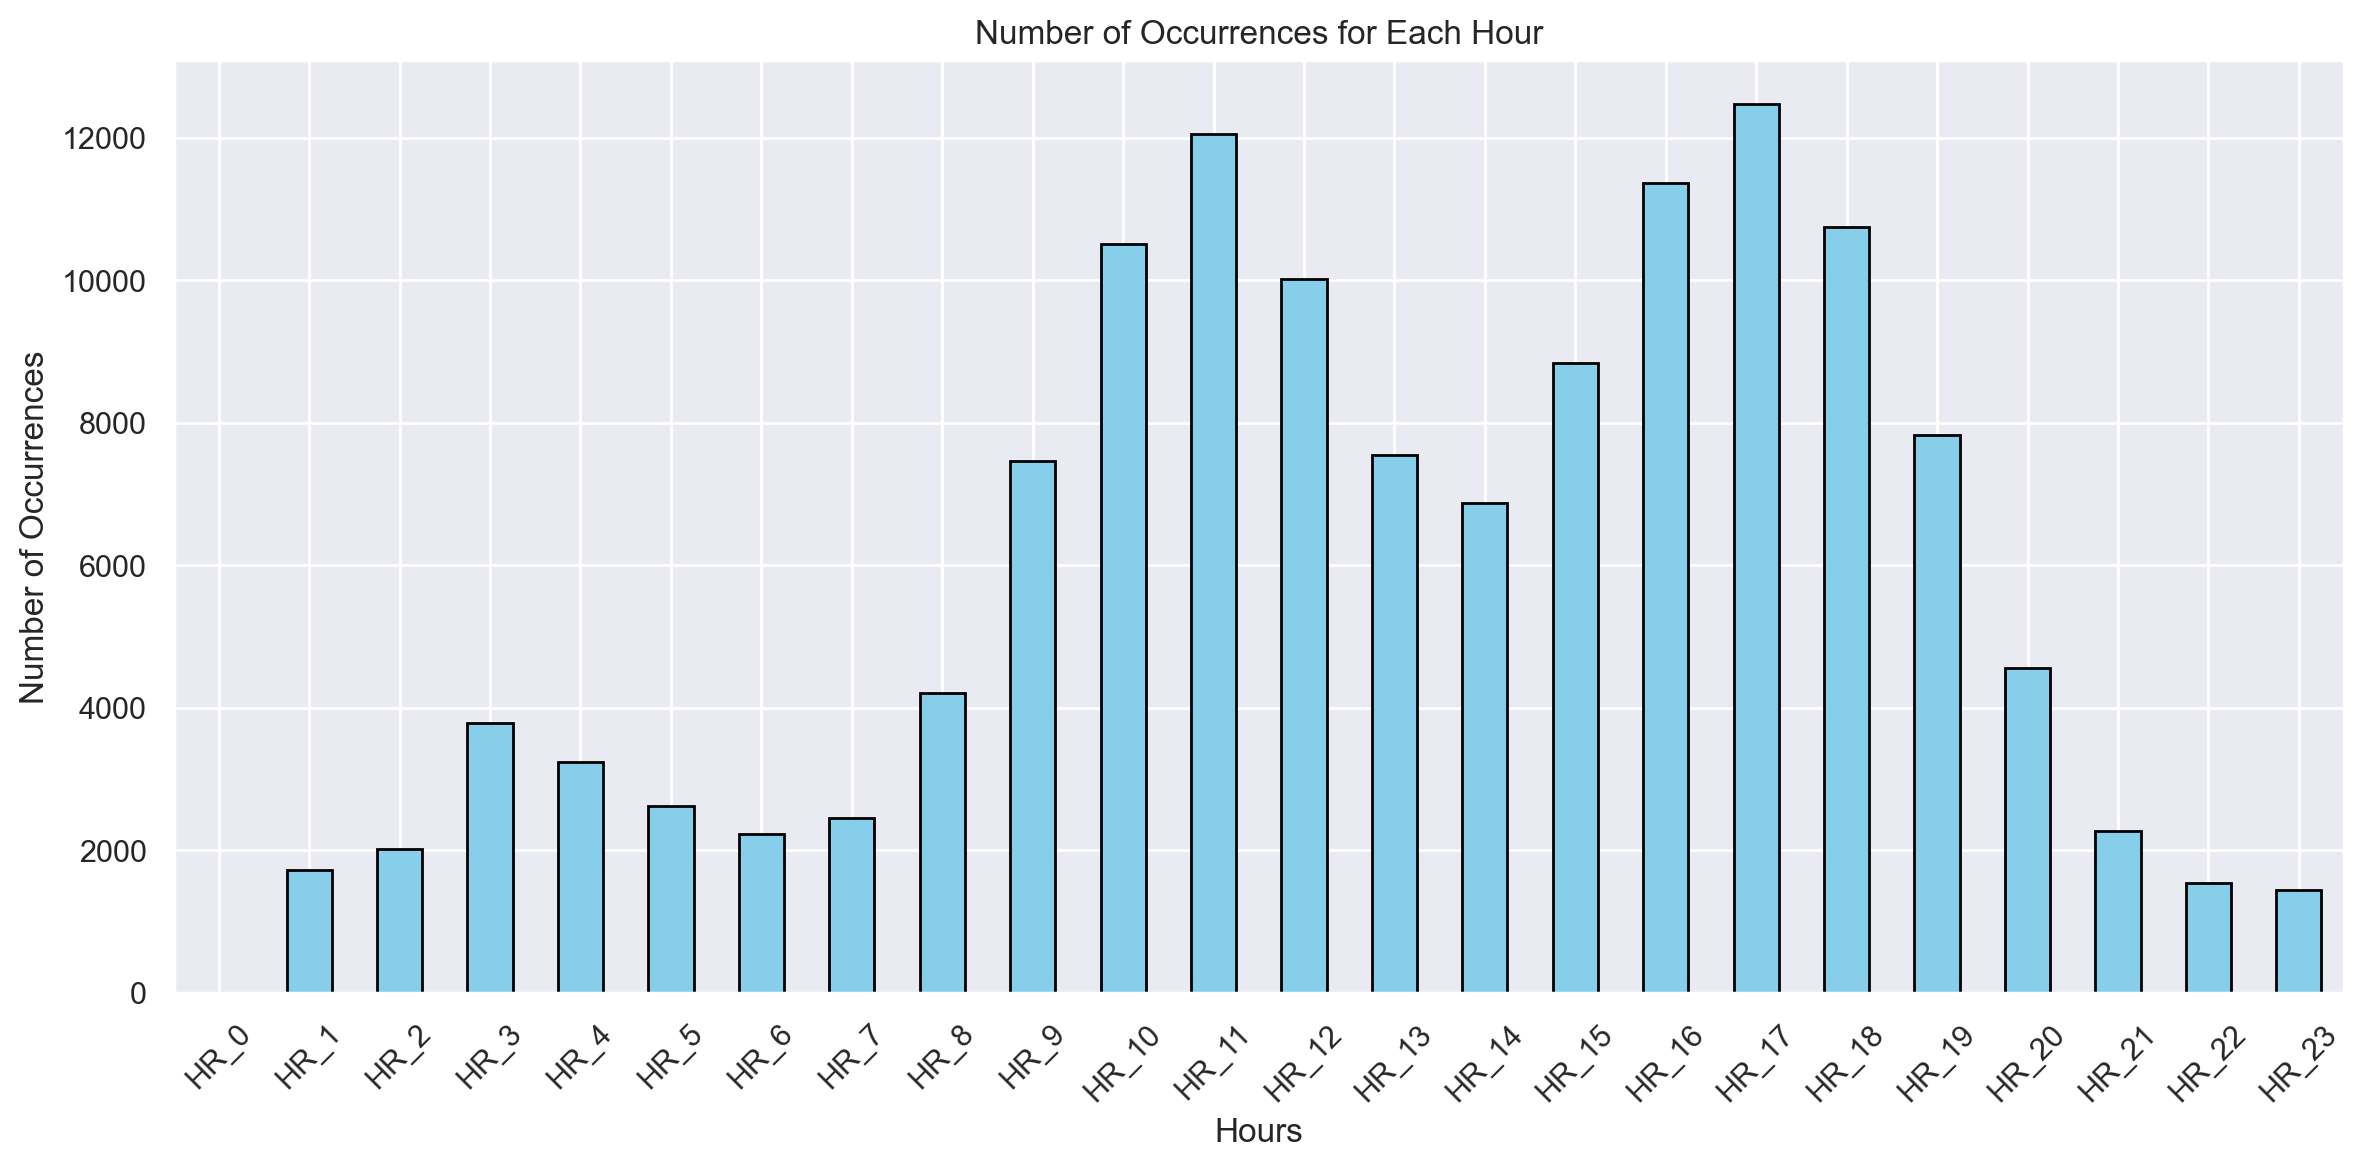

In [37]:
HR_columns = [col for col in df.columns if col.startswith('HR_')]
HR_counts = df[HR_columns].sum()
#HR_counts_sorted = HR_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
HR_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Occurrences for Each Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

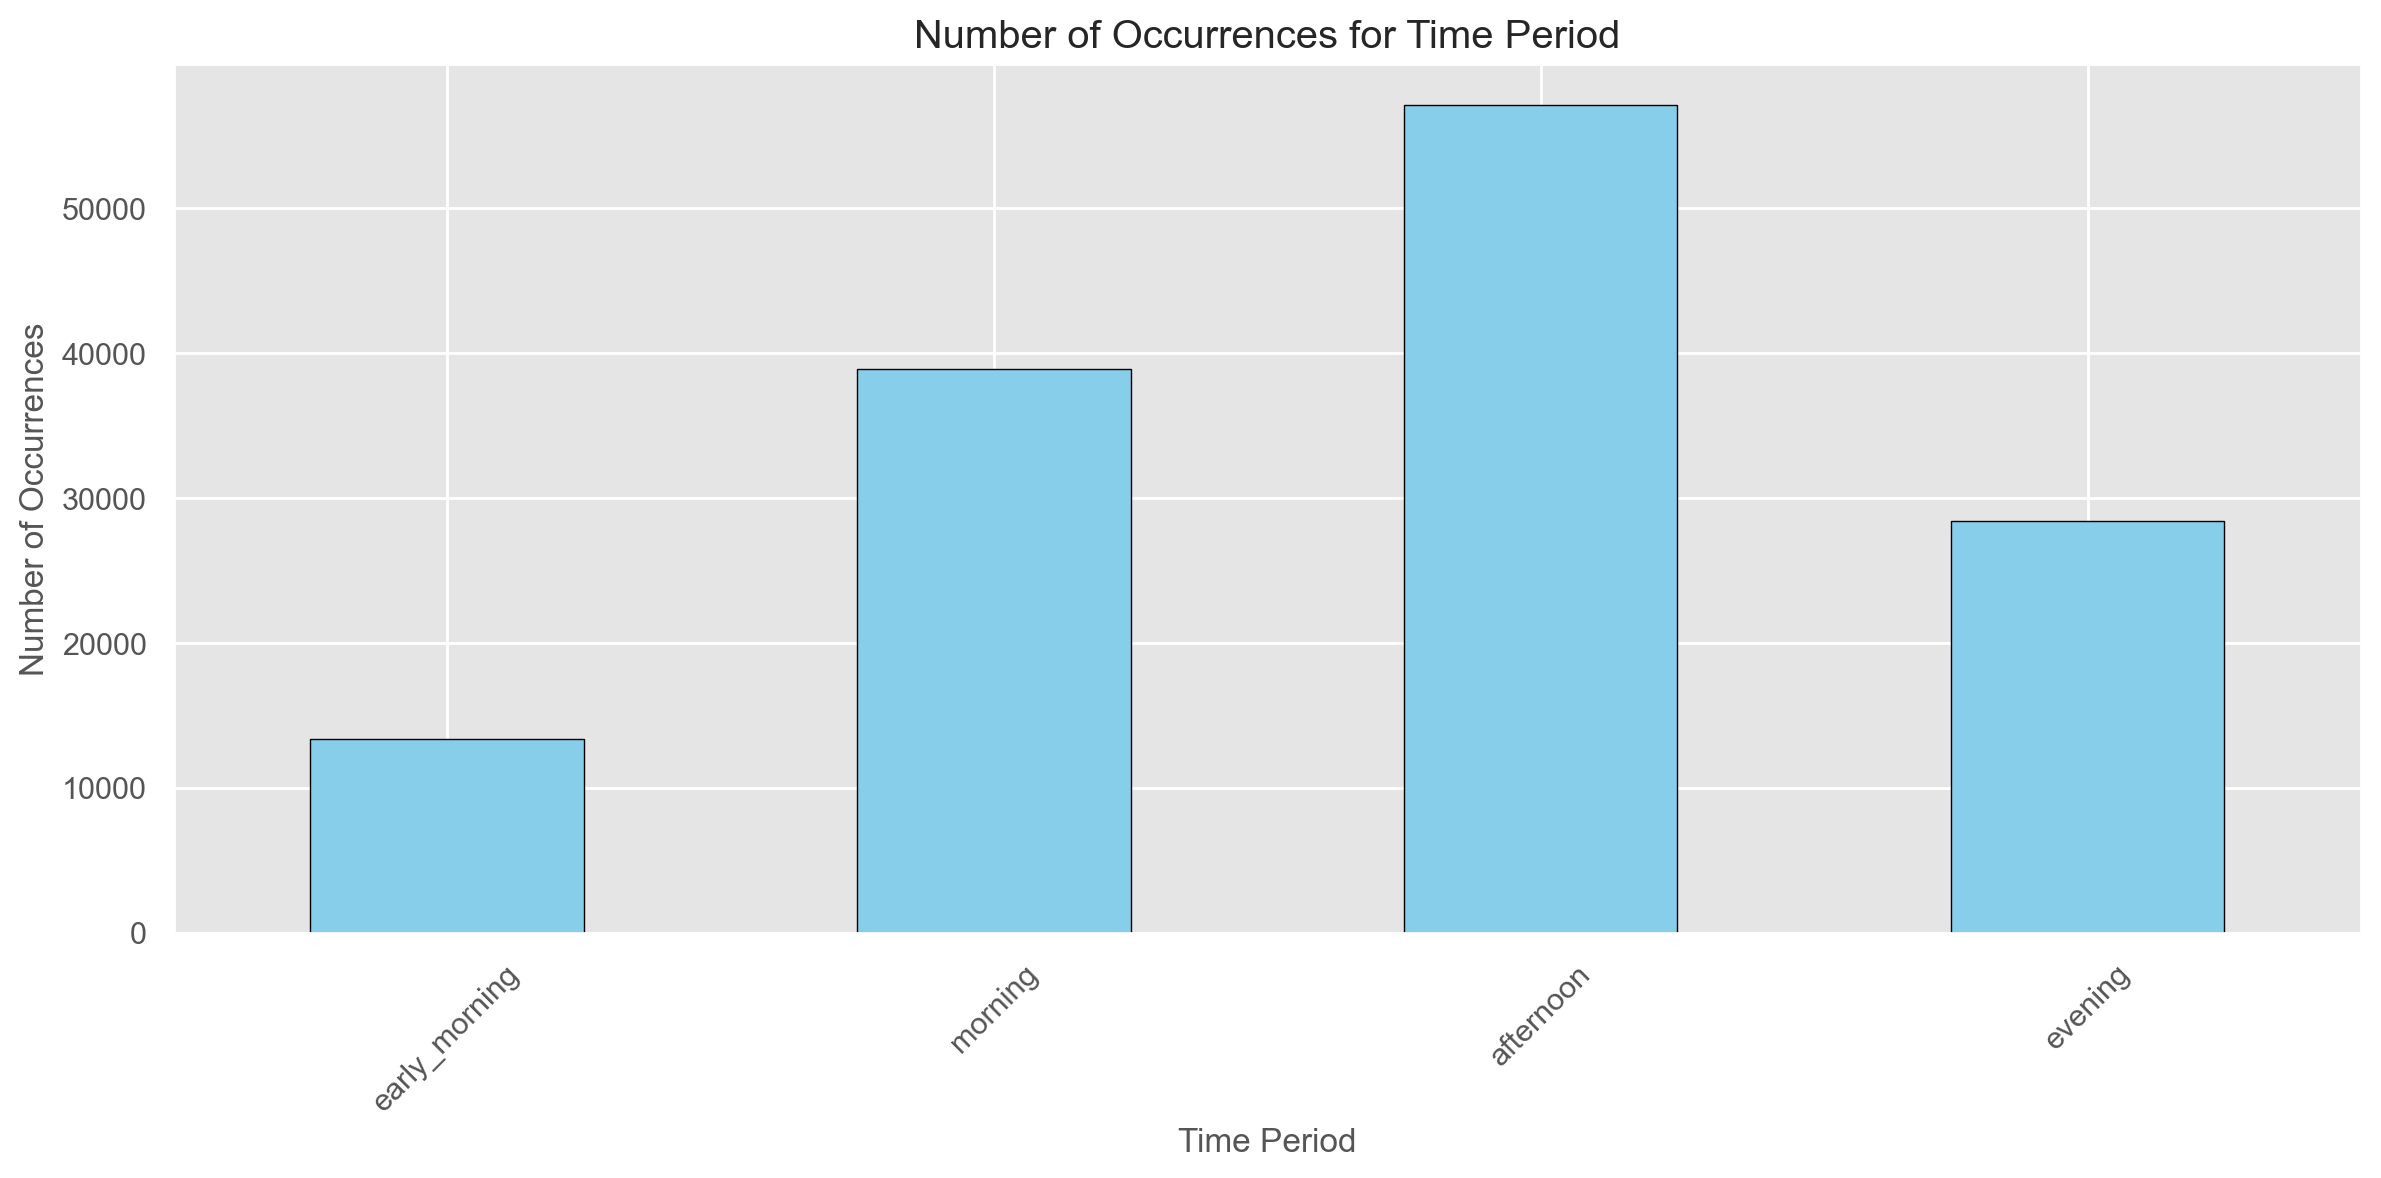

In [149]:
time_columns = ['early_morning', 'morning', 'afternoon', 'evening']
time_counts = df[time_columns].sum()


plt.figure(figsize=(12, 6))
time_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Occurrences for Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Feature Relationships

In [40]:
df_corr = df[['customer_age', 
              'vendor_count',
               'product_count', 
              'is_chain', 
              'first_order', 
              'last_order'
             ]].corr()
df_corr

,customer_age,vendor_count,product_count,is_chain,first_order,last_order
customer_age,1.000000,0.000952,0.005372,0.001783,0.004643,0.012715
vendor_count,0.000952,1.000000,0.827636,0.762916,-0.386735,0.377479
product_count,0.005372,0.827636,1.000000,0.827071,-0.358568,0.350343
is_chain,0.001783,0.762916,0.827071,1.000000,-0.331144,0.298150
first_order,0.004643,-0.386735,-0.358568,-0.331144,1.000000,0.219895
last_order,0.012715,0.377479,0.350343,0.298150,0.219895,1.000000


<Axes: >

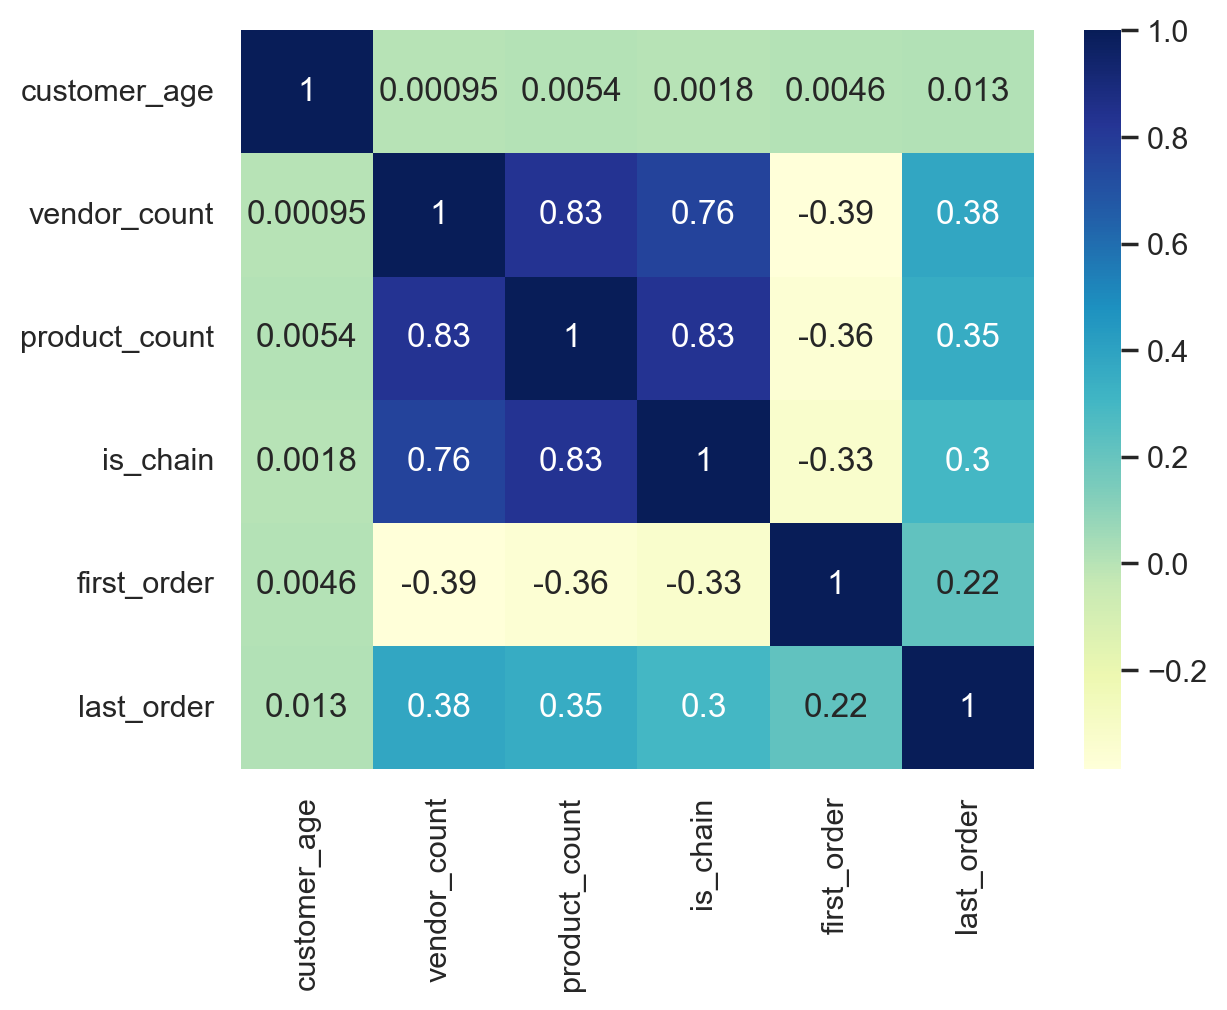

In [41]:
sns.heatmap(df_corr, annot=True, cmap='YlGnBu')

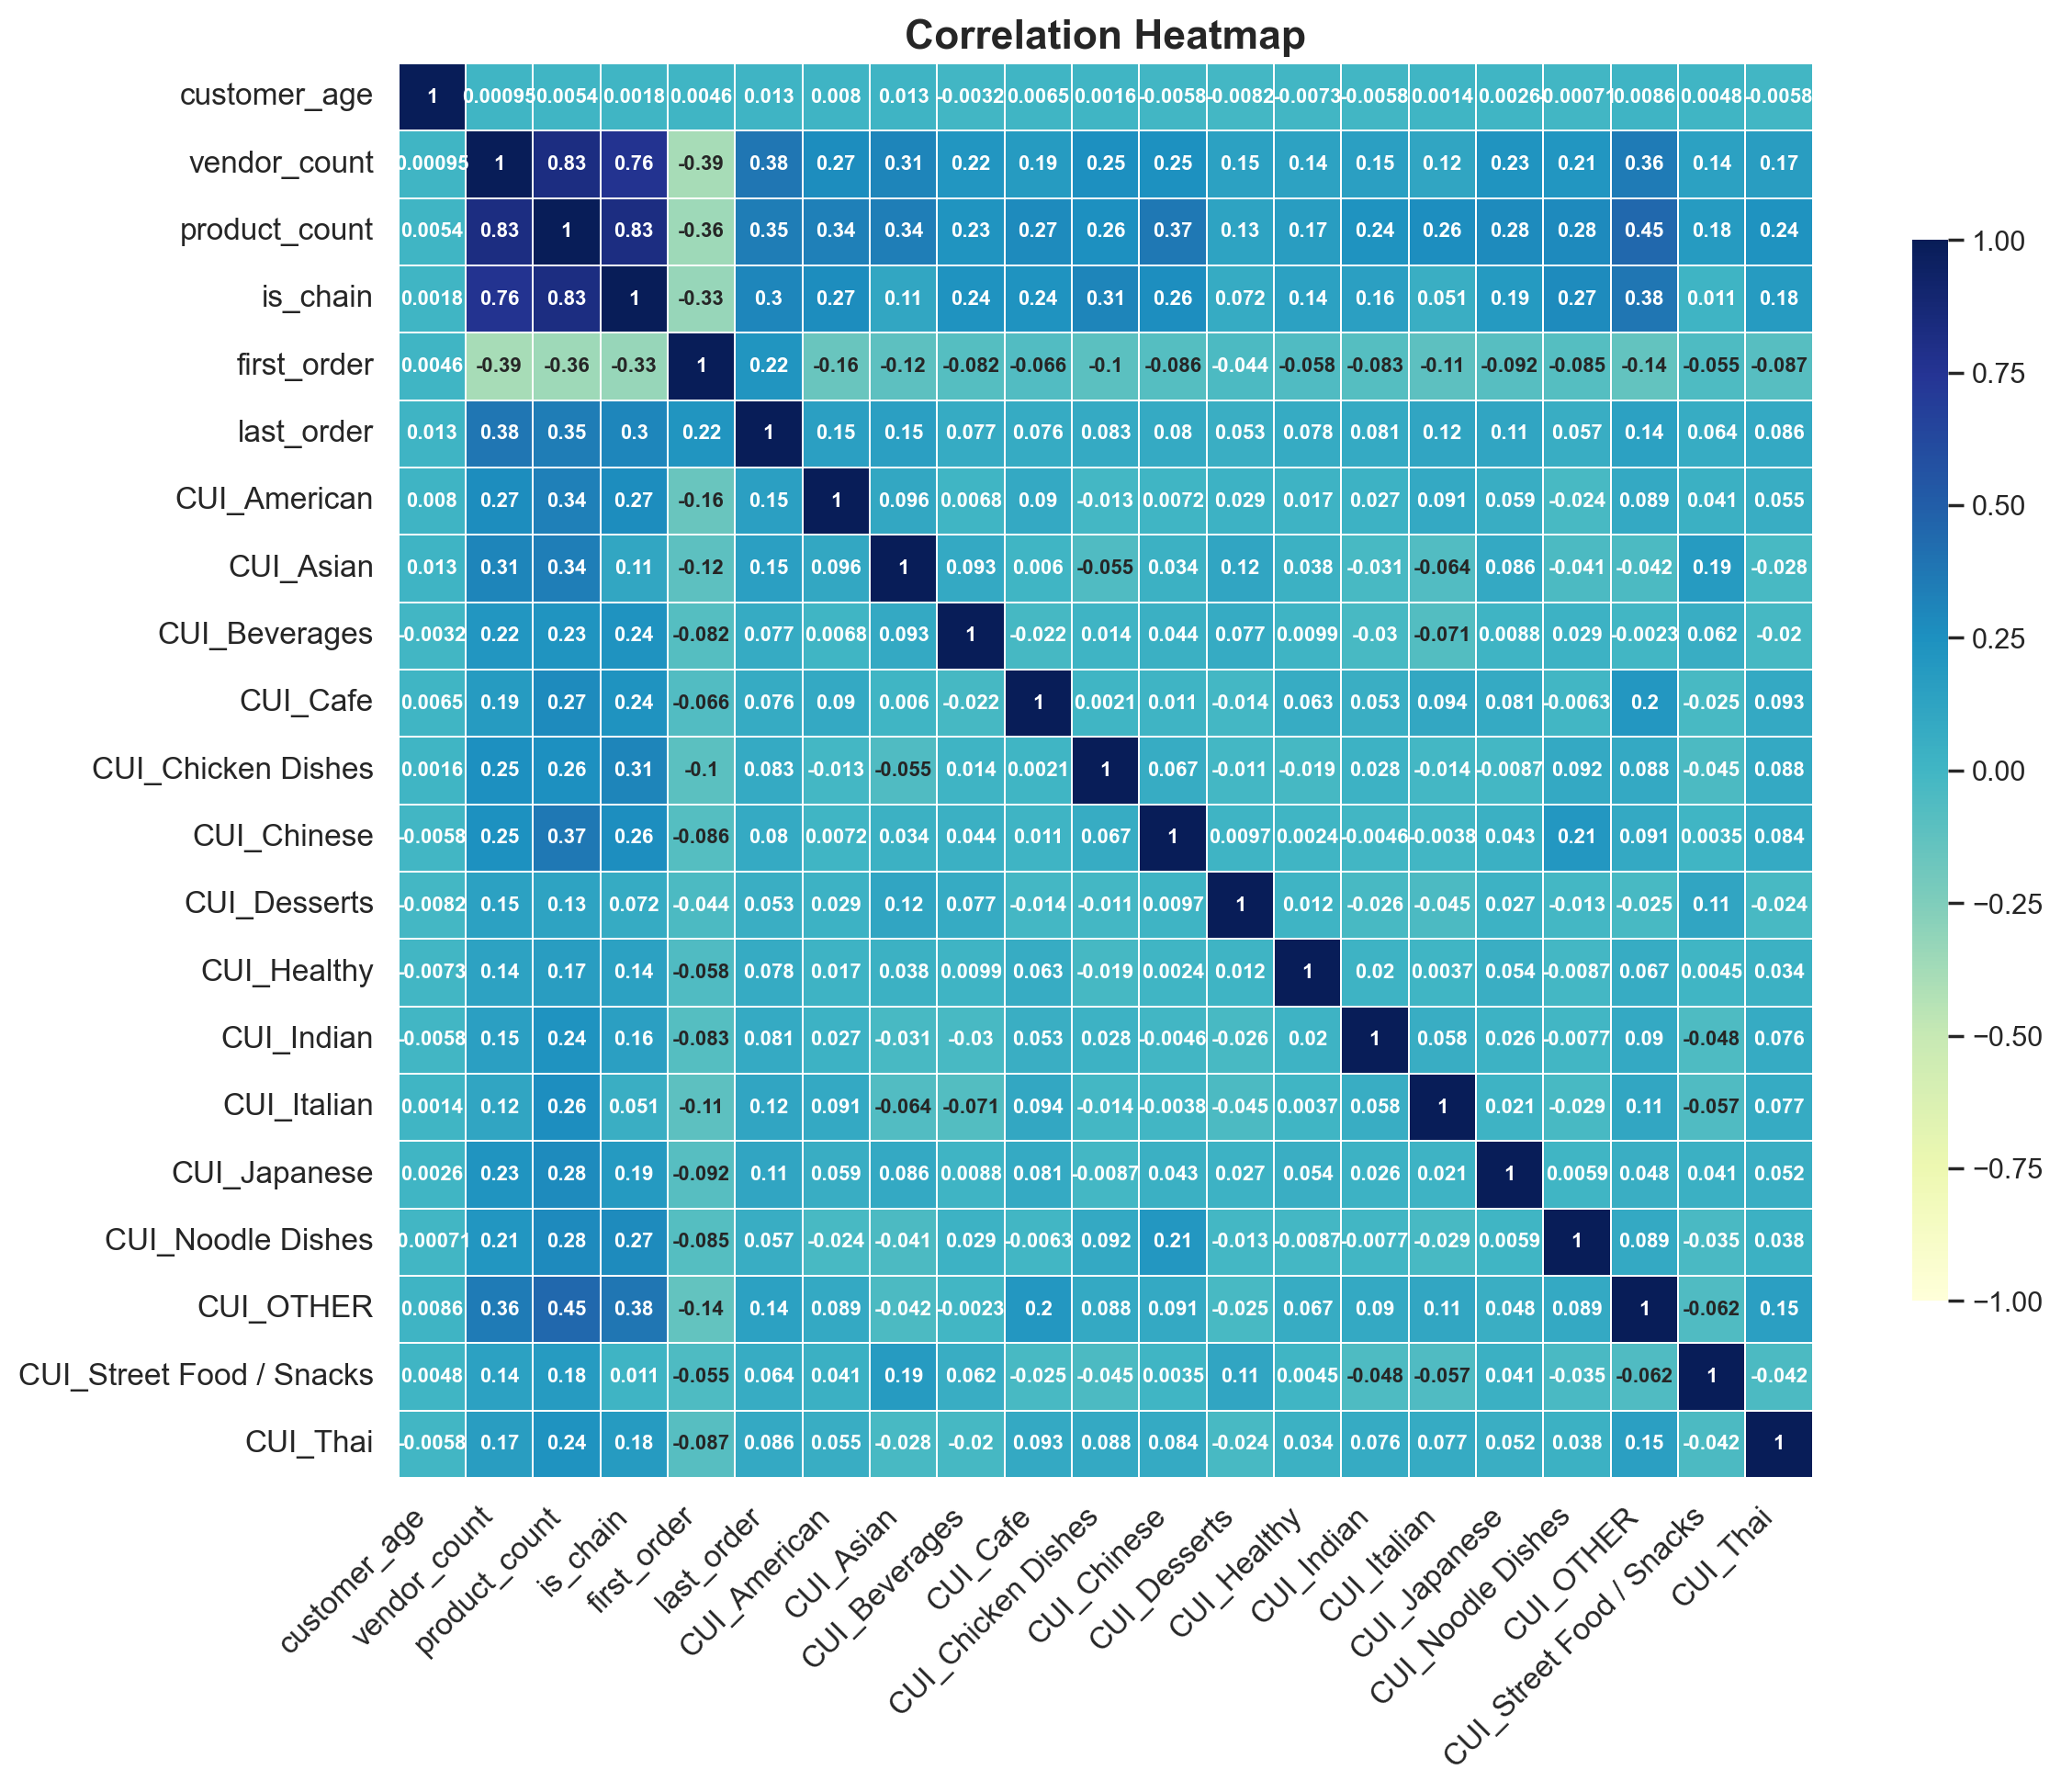

In [42]:
df_corr_all=df[['customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai']].corr()

plt.figure(figsize=(14, 10)) 


sns.heatmap(df_corr_all, annot=True,
            linewidths=0.7, vmin=-1, vmax=1, square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30}, 
            annot_kws={'size': 8, 'weight':'bold' },  
            cmap='YlGnBu')  

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title('Correlation Heatmap', fontsize=16, weight='bold')

plt.show()

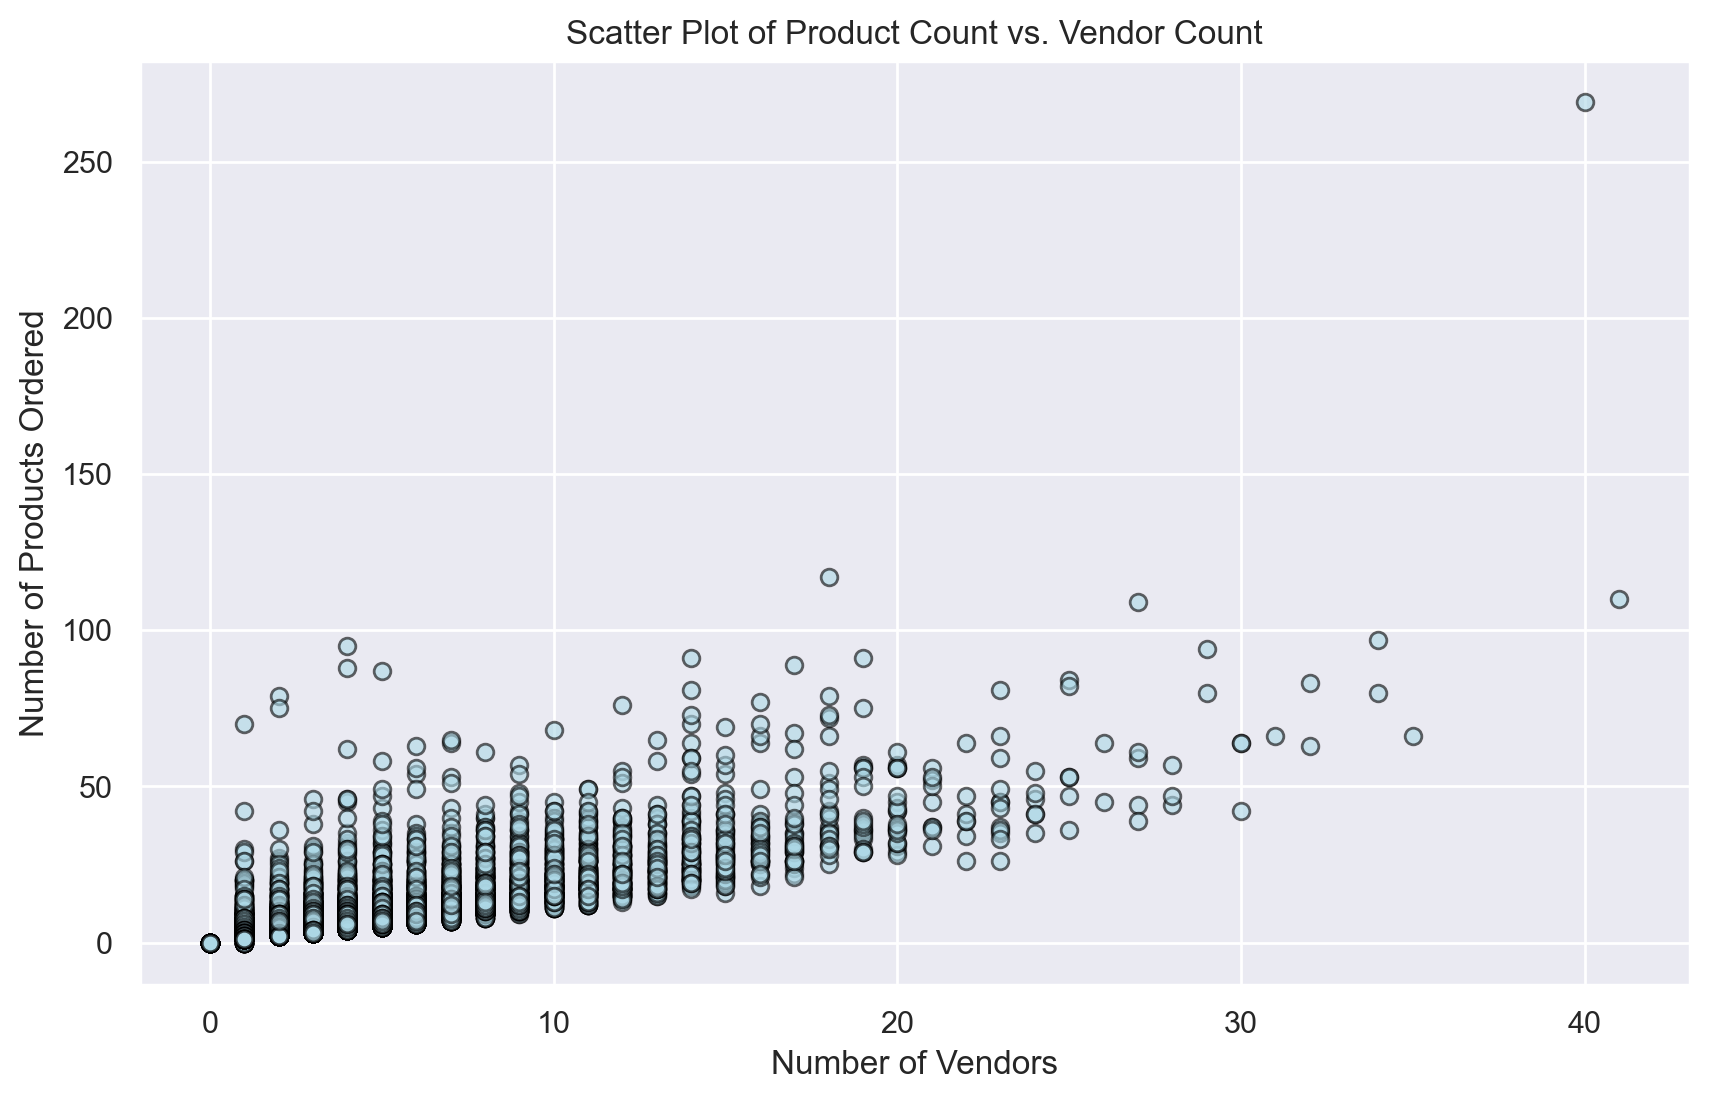

In [43]:
x = df['vendor_count']  # Number of vendors
y = df['product_count']  # Number of products ordered

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='lightblue', edgecolor='black')

plt.title('Scatter Plot of Product Count vs. Vendor Count')
plt.xlabel('Number of Vendors')
plt.ylabel('Number of Products Ordered')
plt.grid(True)
plt.show()

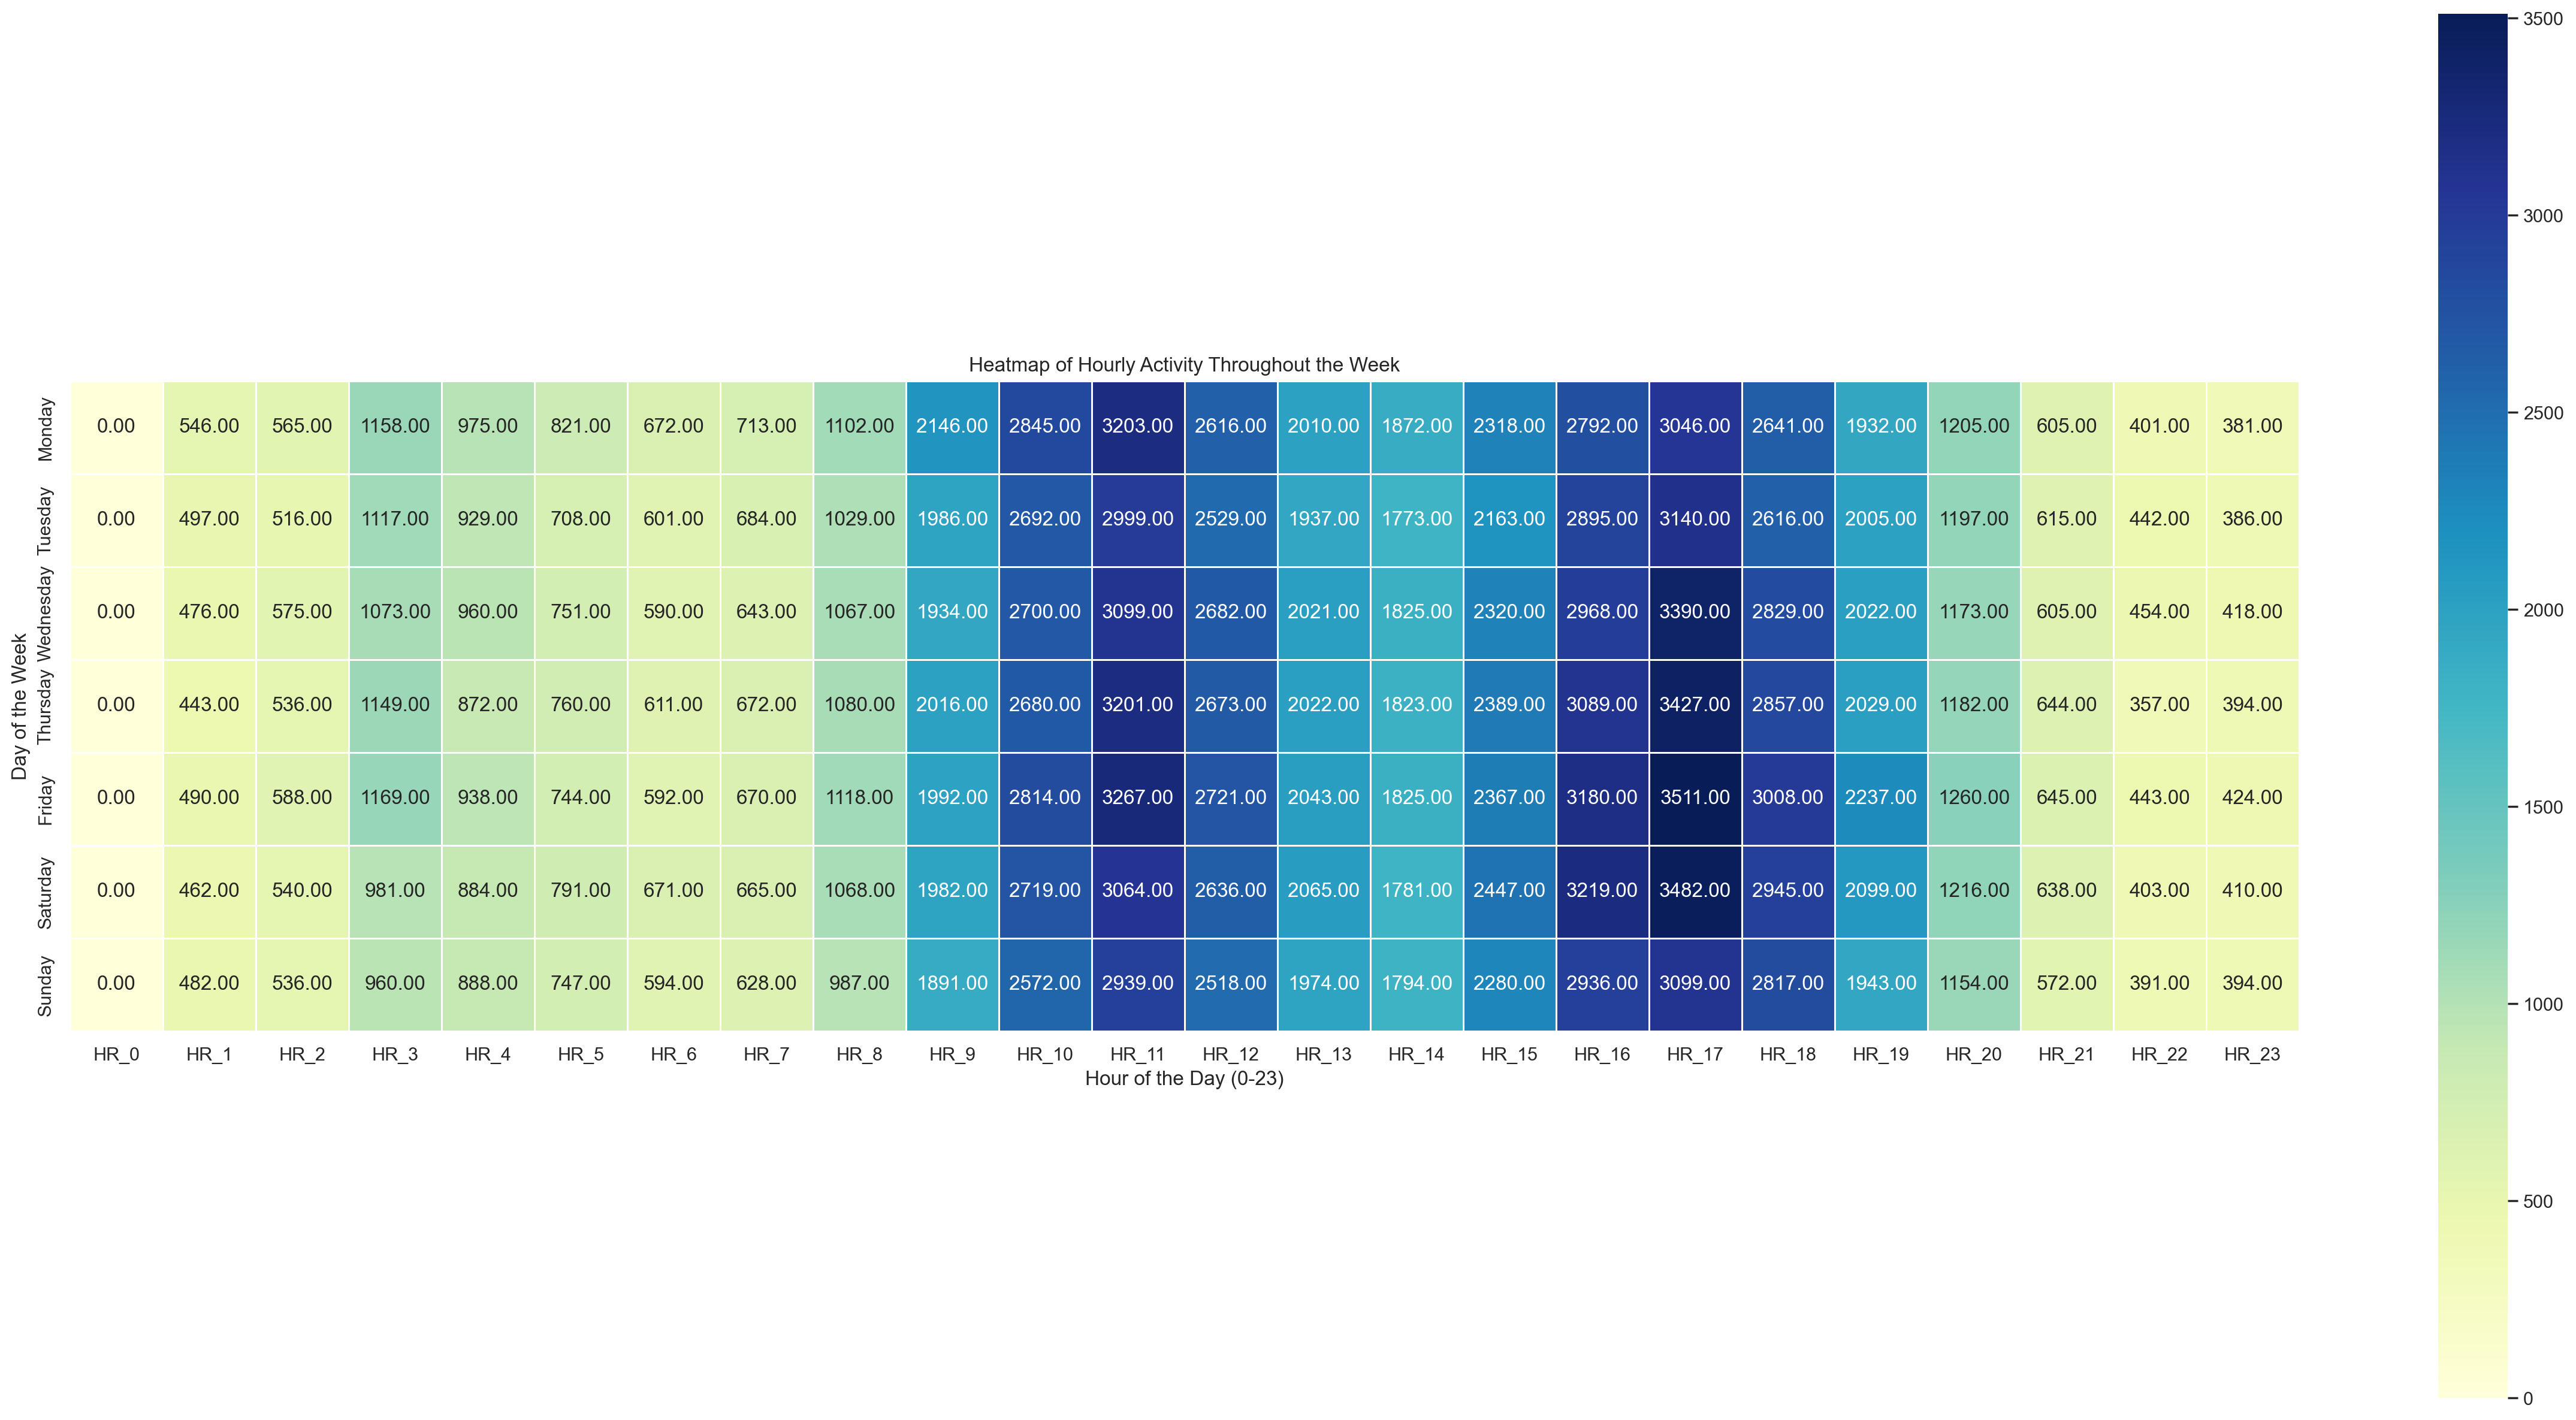

In [44]:
# List of columns representing hours of the day
hour_columns = [col for col in df.columns if col.startswith('HR_')]

# List of days of the week in the correct order
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create an empty DataFrame to store the aggregated activity, initializing with zeros
heatmap_data = pd.DataFrame(index=days_of_week, columns=hour_columns)

# Sum the hourly activity for each day and fill in the heatmap data
for day in days_of_week:
    # Summing the hourly columns for the current day and filling NaNs with zero
    heatmap_data.loc[day] = df.loc[df[day] == 1, hour_columns].sum().fillna(0)

# Convert all data to numeric (float)
heatmap_data = heatmap_data.astype(float)

# Plot the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=1, annot=True, square=True, fmt='.2f')
plt.title('Heatmap of Hourly Activity Throughout the Week')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Day of the Week')
plt.show()



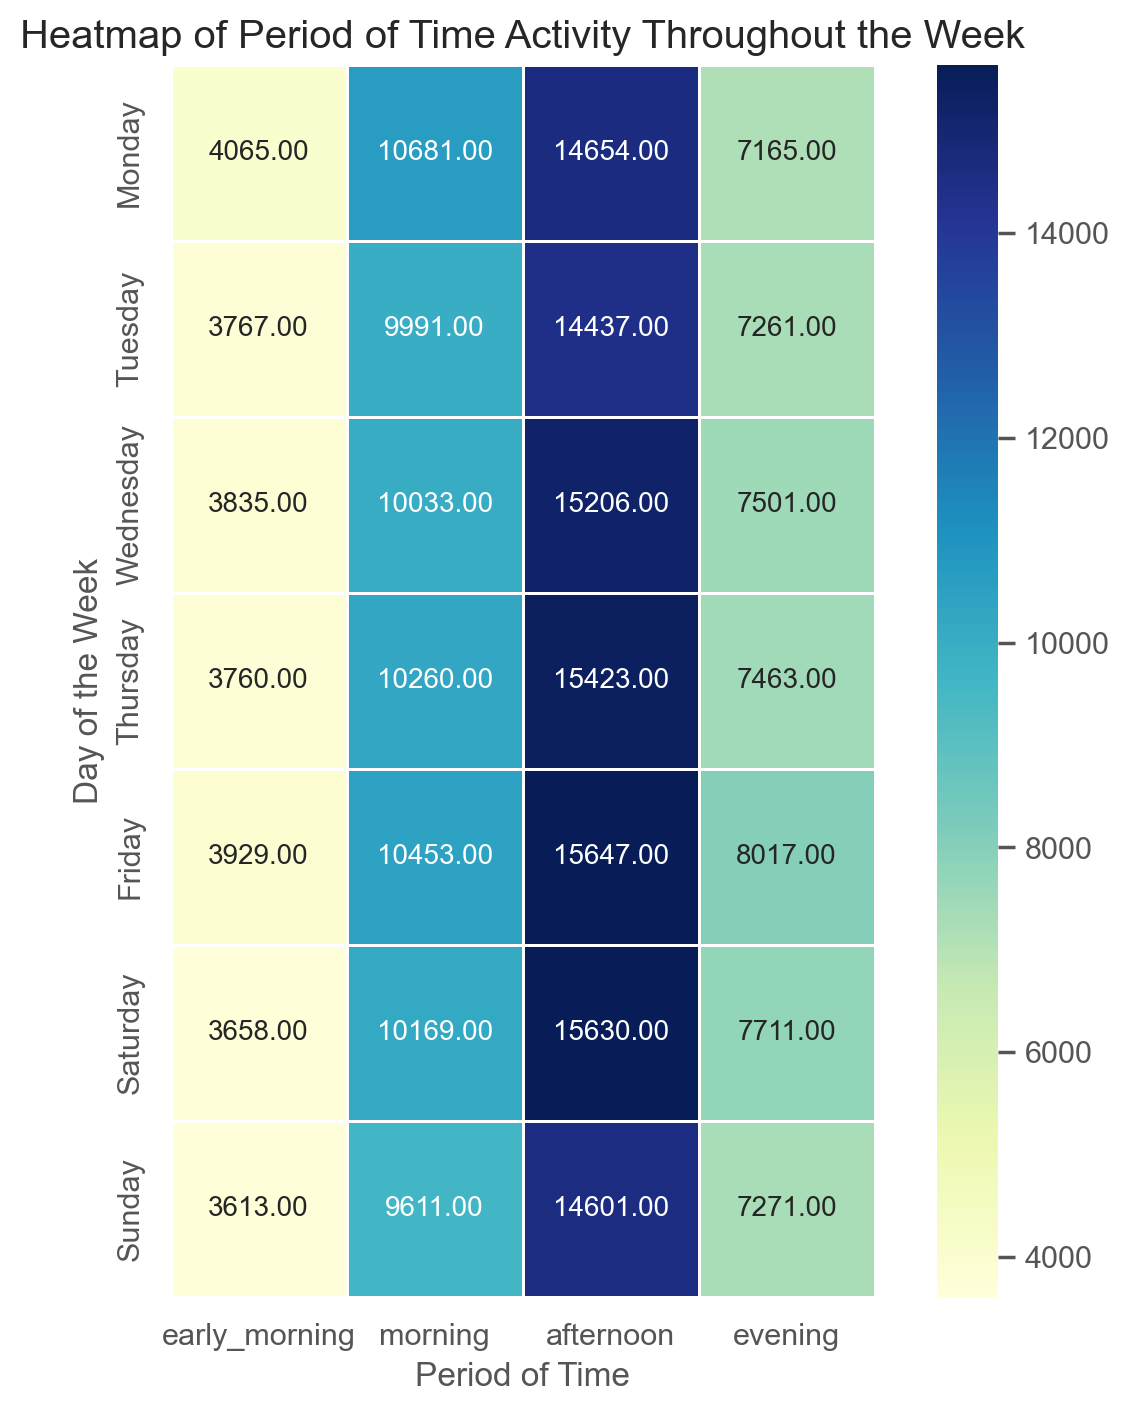

In [151]:
# List of columns representing periods of time
time_columns = ['early_morning', 'morning', 'afternoon', 'evening']

# List of days of the week in the correct order
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create an empty DataFrame to store the aggregated activity, initializing with zeros
heatmap_data = pd.DataFrame(index=days_of_week, columns=time_columns)

# Sum the hourly activity for each day and fill in the heatmap data
for day in days_of_week:
    # Summing the hourly columns for the current day and filling NaNs with zero
    heatmap_data.loc[day] = df.loc[df[day] == 1, time_columns].sum().fillna(0)

# Convert all data to numeric (float)
heatmap_data = heatmap_data.astype(float)

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, square=True, fmt='.2f')
plt.title('Heatmap of Period of Time Activity Throughout the Week')
plt.xlabel('Period of Time')
plt.ylabel('Day of the Week')
plt.show()

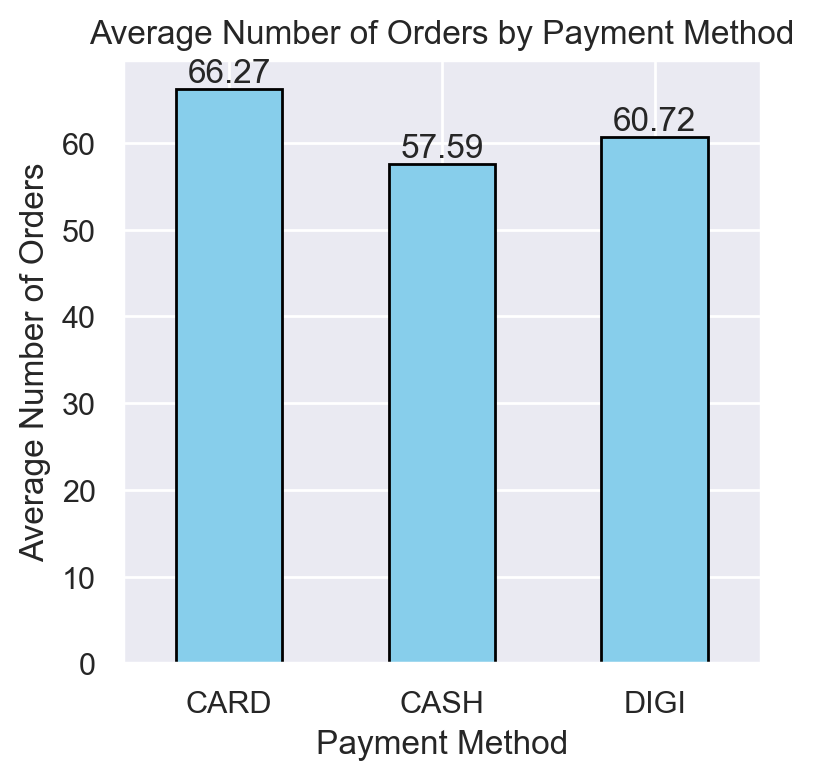

In [46]:
# Calculate average number of orders per payment method
order_frequency = df.groupby('payment_method')['last_order'].mean()

plt.figure(figsize=(4,4))
order_frequency.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Average Number of Orders by Payment Method', fontsize=12)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Average Number of Orders', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(order_frequency):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Enhance the style
plt.style.use('ggplot')
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\anama\AppData\Local\Temp\ipykernel_50428\3566903472.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuisine_by_age = df.groupby('age_group')[cuisine_columns].mean()


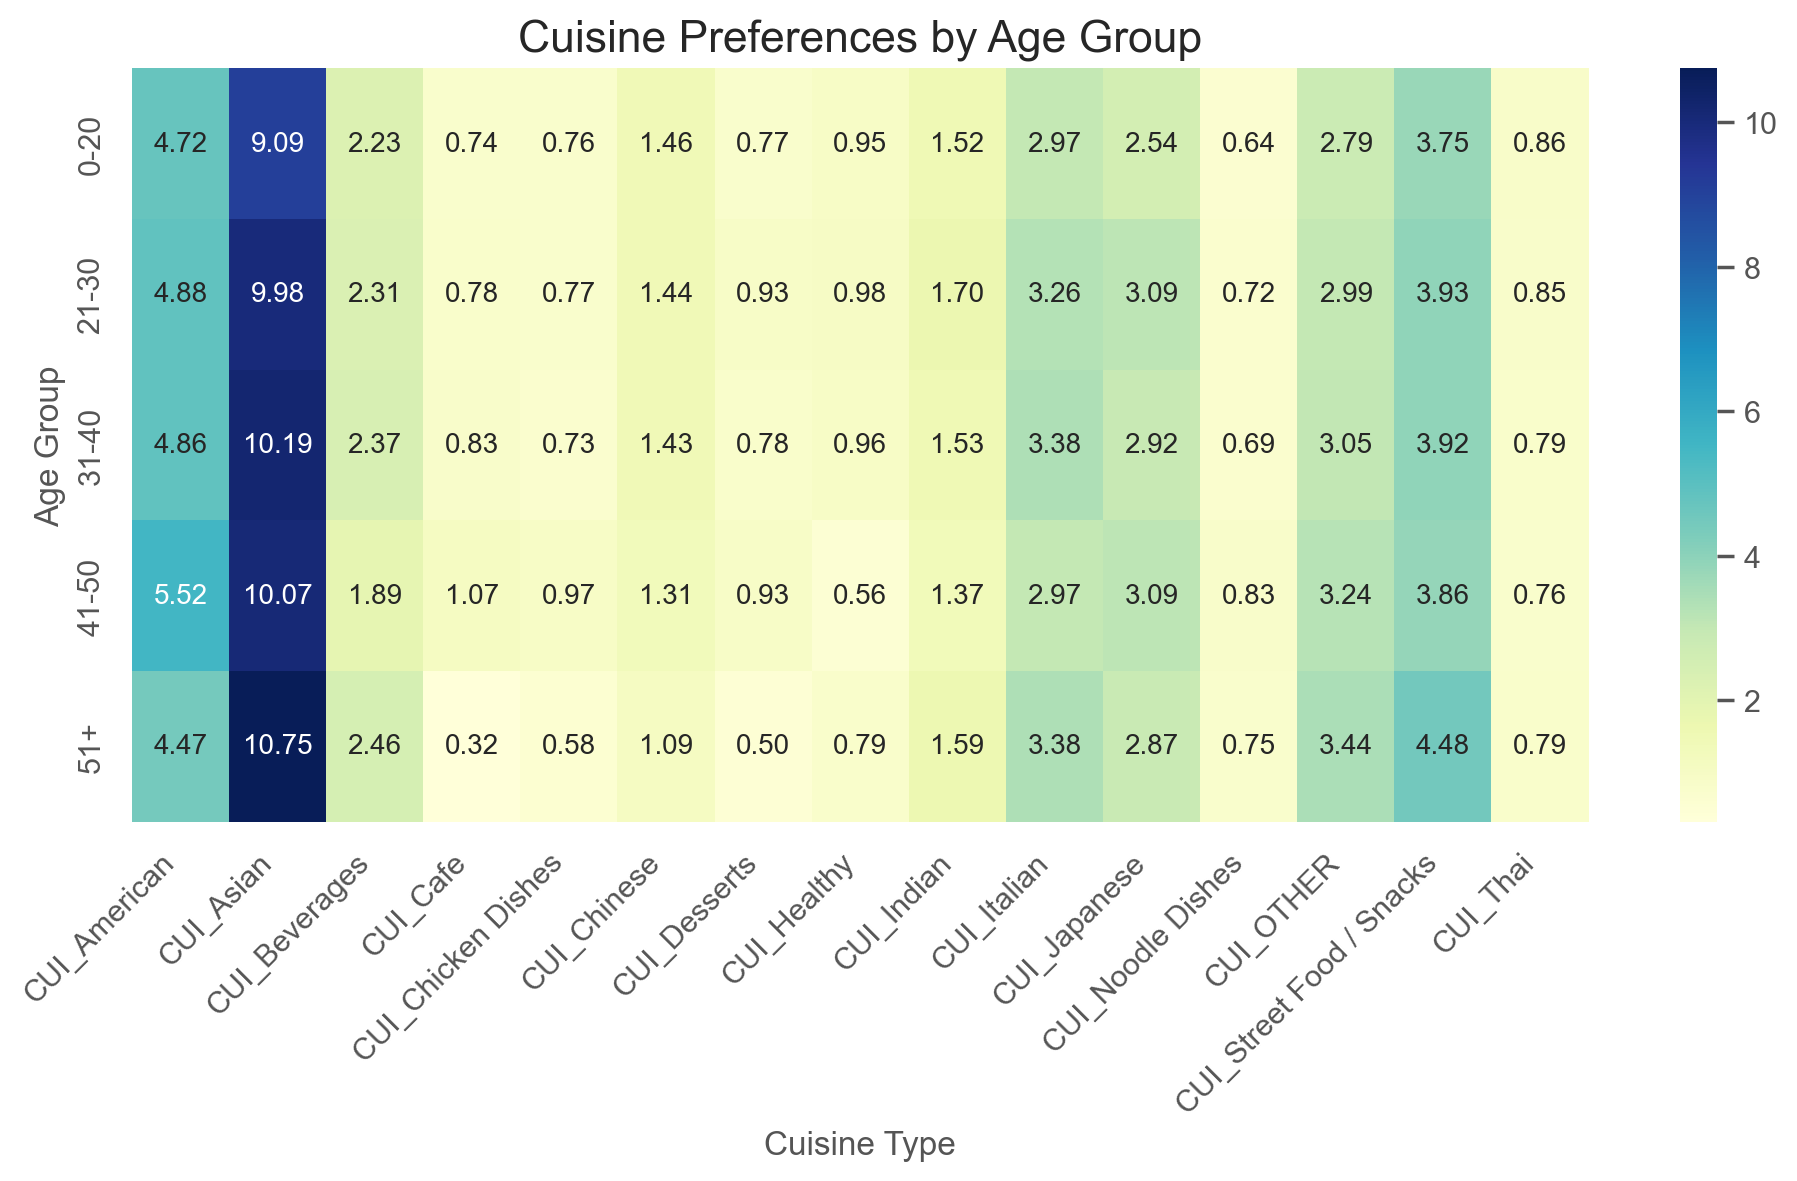

In [47]:
# Create age groups
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 20, 30, 40, 50, 100], labels=['0-20', '21-30', '31-40', '41-50', '51+'])

cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
cuisine_by_age = df.groupby('age_group')[cuisine_columns].mean()


plt.figure(figsize=(10, 6))
sns.heatmap(cuisine_by_age, annot=True, cmap="YlGnBu", fmt='.2f')

plt.title('Cuisine Preferences by Age Group', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Age Group', fontsize=12)


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
